# **Pelatihan Vision and Control Programmer GAMAFORECE 2024: Computer Vision**

## **Setup**

**Note: Do all of this inside your Terminal**
1. **Prerequisites**
    ```
    sudo apt install python-is-python3
    sudo apt install python3-pip
    ```

2. **Miniconda**
    * Download Miniconda Installer 
    ```
    curl https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh -o Miniconda3-latest-Linux-x86_64.sh
    ```

    * Run the Installer
    ```
    bash Miniconda3-latest-Linux-x86_64.sh
    ```

    * Initialize Conda
    ```
    source ~/.bashrc
    ```
    Or
    ```python
    conda activate base # 'base' ini environment default yang otomatis kebuat sama Miniconda
    ```

    * Check The Installation Result
    ```
    conda --version
    python --version
    ```
    * Download the `environment.yml` from [this link](https://drive.google.com/file/d/12ne0giPuJ1lmnCKHeKHCaTU_ctsfSvFO/view?usp=sharing)

    * Create the Environment
    ```
    conda env create --name viscon -f environment.yml
    ```

    * Activate the Environment
    ```
    conda activate viscon
    ```

    * Install Jupyter and Conda Integration
    ```
    conda install -y jupyter
    conda install -c conda-forge nb_conda
    ```
    
    * Install OpenCV
    ```
    conda install -c conda-forge opencv
    ```

    * Set Up the Jupyter Kernel
    ```
    python -m ipykernel install --user --name viscon --display-name "Python (Vision and Control)"
    ```
    
3. **Run Jupyter Notebook**
  ```
  mkdir pelatihan-vision
  cd pelatihan-vision
  jupter notebook
  ```

## **Assets**
* Download the assets file from [this link](https://drive.google.com/file/d/1-rDLqP_qw2acK7JJU-WnD5hJGunVUujb/view?usp=sharing)

* Extract it into the `pelatihan-vision` folder

* Your working space would be something like this:
```
  pelatihan-vision
  ├── assets
  │   ├── beautiful-view.jpg
  │   ├── bitwise-truth-table.jpg
  │   ├── boat
  │   │   ├── boat1.jpg
  │   │   ├── boat2.jpg
  │   │   ├── boat3.jpg
  │   │   ├── boat4.jpg
  │   │   ├── boat5.jpg
  │   │   └── boat6.jpg
  │   ├── checkerboard_18x18.png
  │   ├── checkerboard_color.png
  │   ├── display_image.py
  │   ├── dteti-logo-setengah.png
  │   ├── form.jpg
  │   ├── gate.jpg
  │   ├── hsv-color-wheel.jpeg
  │   ├── piano-sheet-music.png
  │   ├── process-bitwise-project.png
  │   ├── rainbow-color-palette.png
  │   ├── scanned-form.jpg
  │   └── types-of-transformations.jpg
  └── Pelatihan V&C Programmer 2025.ipynb
```

## **Head's Up!**
* In this module, we'll provide you with the explanation about the topics, and also the code.
* There are also hands-on projects, but you need to fill some of the lines.

## **============================== START ==============================**

## **Dependencies**

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob
from IPython.display import Image, display
from charminal import *

In [4]:
!python -m pip install -U matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 2.0 MB/s eta 0:00:00m eta 0:00:010:00:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.4
    Uninstalling matplotlib-3.8.4:
      Successfully uninstalled matplotlib-3.8.4


## **Basic Image Handling**

* **Load Images**
  ```
  cv2.IMREAD_GRAYSCALE or 0   : Loads image in grayscale mode
  cv2.IMREAD_COLOR or 1       : Loads a color image. Any transparency of image will be neglected. It is the default flag.
  cv2.IMREAD_UNCHANGED or -1  : Loads image as such including alpha channel.
  ```

### **Load the Images**

In [5]:
# Load the image with different flags
print(f'{EMOJI_BEGIN} Loading the images')
img_color = cv2.imread('./assets/beautiful-view.jpg', cv2.IMREAD_COLOR)  # Load as color
img_gray = cv2.imread('./assets/beautiful-view.jpg', cv2.IMREAD_GRAYSCALE)  # Load as grayscale
img_unchanged = cv2.imread('./assets/beautiful-view.jpg', cv2.IMREAD_UNCHANGED)  # Load as-is, including alpha channel

img_checkerboard = cv2.imread('./assets/checkerboard_18x18.png', cv2.IMREAD_GRAYSCALE)

🚀 Loading the images


### **See How Images are Represented in OpenCV**

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

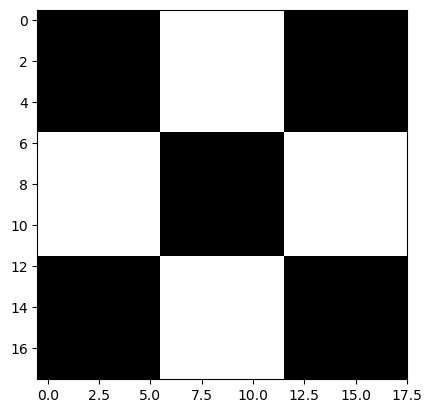

In [6]:
print(img_checkerboard)
plt.imshow(img_checkerboard, cmap='gray')
plt.show()

### **Change the Color Space from BGR to RGB**

In [7]:
img_color_rgb_1 = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB) # Use cv2.cvtColor()
img_color_rgb_2 = img_color[:, :, ::-1]                      # Use array reversal

### **Display The Images**

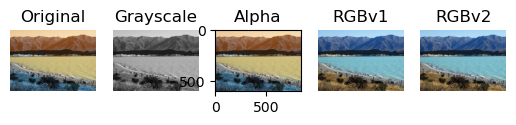

In [14]:
# Display loaded images
plt.subplot(1, 5, 1)
plt.title('Original')
plt.axis('off')
plt.imshow(img_color)

plt.subplot(1, 5, 2)
plt.title('Grayscale')
plt.axis('off')
plt.imshow(img_gray, cmap='gray')

plt.subplot(1, 5, 3)
# plt.axis('off')
plt.title('Alpha')
plt.imshow(img_unchanged) 

plt.subplot(1, 5, 4)
plt.axis('off')
plt.title('RGBv1')
plt.imshow(img_color_rgb_1)

plt.subplot(1, 5, 5)
plt.axis('off')
plt.title('RGBv2')
plt.imshow(img_color_rgb_1) 

plt.show()

### **See Image Shapes**

In [9]:
# Check image attributes
print(f'{EMOJI_PIN} Color image shape: {img_color.shape}')
print(f'{EMOJI_PIN} Color gray shape: {img_gray.shape}')
print(f'{EMOJI_PIN} Color unchanged shape: {img_unchanged.shape}')

📌 Color image shape: (600, 840, 3)
📌 Color gray shape: (600, 840)
📌 Color unchanged shape: (600, 840, 3)


### **Save Images**

In [10]:
# Save the original image (or any processed image)
cv2.imwrite("image_aku_cv2.png", img_color)  # Saves in BGR format

# Saving a matplotlib plot as an image
plt.imsave('image_aku_plt.png', img_color)
print(f"{EMOJI_SAVING} Images saved as 'saved_image.png' and 'saved_plot.png'")

💾 Images saved as 'saved_image.png' and 'saved_plot.png'


## **Basic Image Operations**
### **Crop, Resize and Flip Images**

In [11]:
# Cropping
cropped_region = img_color[200:400, 300:600]
print(f'{EMOJI_PIN} cropped_region shape: {cropped_region.shape}')

# Resizing
# Syntax: dst = resize( src, dsize[, dst[, fx[, fy[, interpolation]]]] )
resized_cropped_region_2x = cv2.resize(cropped_region, None, fx=0.5, fy=0.5)
print(f'{EMOJI_PIN} resized_cropped_region_2x shape: {resized_cropped_region_2x.shape}')

# Flipping
flipped_horz = cv2.flip(img_color, 1)  # Flip Horizontally
flipped_vert = cv2.flip(img_color, 0)  # Flip Vertically
flipped_both = cv2.flip(img_color, -1) # Flip Both

📌 cropped_region shape: (200, 300, 3)
📌 resized_cropped_region_2x shape: (100, 150, 3)


Object `?` not found.
Object `?` not found.
Object `?` not found.
Object `?` not found.
Object `?` not found.
Object `?` not found.


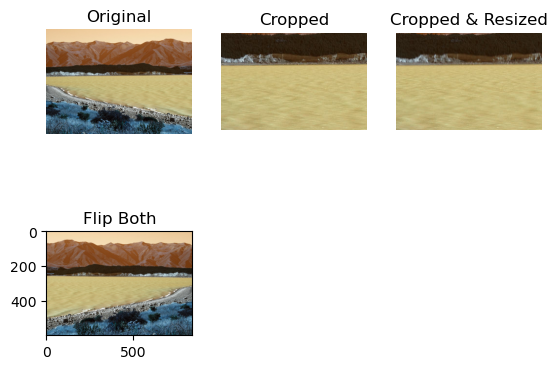

In [12]:
plt.subplot(2, 3, 1)
plt.axis('off')
plt.title('Original')
plt.imshow(img_color)

plt.subplot(2, 3, 2)
plt.axis('off')
plt.title('Cropped')
plt.imshow(cropped_region) 

plt.subplot(2, 3, 3)
plt.axis('off')
plt.title('Cropped & Resized')
plt.imshow(resized_cropped_region_2x)

plt.subplot(2, 3, 4)
# plt.axis('off')
plt.title('Flip Horizontally')
plt.imshow(flipped_horz)

########## COBA ISI INI YAA ##########
########## Coba tampilin `flipped_vert` pakai plt kayak line-line di atas
???
???
plt.title('Flip Vertically')
???

########## COBA ISI INI YAA ##########
########## Coba tampilin `flipped_both` pakai plt kayak line-line di atas
???
???
plt.title('Flip Both')
???

plt.show()


## **Accessing Camera**
Since it is hard to open a camera inside Jupyter Notebook file, then let's make a new Python file (`touch open-cam.py`) and then paste this program


```python
import cv2

# Open the default camera
cam = cv2.VideoCapture(0)

# Get the default frame width and height
frame_width = int(cam.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cam.get(cv2.CAP_PROP_FRAME_HEIGHT))

while True:
    ret, frame = cam.read()

    # Display the captured frame
    cv2.imshow('Camera', frame)

    # Press 'q' to exit the loop
    if cv2.waitKey(1) == ord('q') or cv2.waitKey(1) == ord(' '):
        break

# Release the capture and writer objects
cam.release()
cv2.destroyAllWindows()
```

## **Thresholding**

### **Global Thresholding**
Global thresholding applies a fixed threshold across the entire image. If a pixel’s intensity is above the threshold, it is set to the maximum value (white, in a binary threshold), otherwise, it is set to zero (black).

In [13]:
# Load the image in grayscale
img_music = cv2.imread("./assets/piano-sheet-music.png", cv2.IMREAD_GRAYSCALE)

# Perform global thresholding
_, img_thresh_gbl_1 = cv2.threshold(img_music, 50, 255, cv2.THRESH_BINARY)

# Perform global thresholding
########## COBA ISI INI YAA ##########
########## Coba apply global thresholding buat `img_music`, tapi threshold value-nya jadi 130, dan tetap pakai `cv2.THRESH_BINARY`
_, img_thresh_gbl_2 = ???

SyntaxError: invalid syntax (2871873470.py, line 10)

### **Adaptive Thresholding**
Adaptive thresholding calculates the threshold for small regions of the image. This method is useful for images with varying lighting conditions, as it adjusts thresholds based on local neighborhoods.
    * `cv2.ADAPTIVE_THRESH_MEAN_C`: Computes the mean of the neighborhood area.
    * `cv2.ADAPTIVE_THRESH_GAUSSIAN_C`: Computes a weighted sum of neighborhood values where weights are a Gaussian window.

In [ ]:
# Perform adaptive thresholding
img_thresh_adp = cv2.adaptiveThreshold(img_music, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7)

# Show the images
plt.figure(figsize=[18,15])
plt.subplot(221); plt.imshow(img_music,        cmap="gray");  plt.title("Original");
plt.subplot(222); plt.imshow(img_thresh_gbl_1, cmap="gray");  plt.title("Thresholded (global: 50)");
plt.subplot(223); plt.imshow(img_thresh_gbl_2, cmap="gray");  plt.title("Thresholded (global: 130)");
plt.subplot(224); plt.imshow(img_thresh_adp,   cmap="gray");  plt.title("Thresholded (adaptive)");


## **Bitwise Operations**
![Truth Table](./assets/bitwise-truth-table.jpg)


### **Project: Mask The DTETI's Logo**
![bitwise result](./assets/process-bitwise-project.png)

### **Load the Image** (`'./assets/dteti-logo-setengah.png'`)

In [ ]:
img_dteti_bgr = cv2.imread('./assets/dteti-logo-setengah.png')
img_checkerboard_bgr = cv2.imread('./assets/checkerboard_color.png')

### **Convert the Images from BGR to RGB**

In [ ]:
# Convert from BGR to RGB
########## COBA INI YAA ##########
########## Coba convert color space `img_dteti_bgr` dari BGR ke RGB
img_dteti_rgb = ???

########## COBA INI YAA ##########
########## Coba convert color space `img_checkerboard_bgr` dari BGR ke RGB
img_checkerboard_rgb = ???

### **Display the Images**

In [ ]:
plt.subplot(1, 2, 1)
plt.title('Logo')
plt.axis('off')
plt.imshow(img_dteti_rgb)

plt.subplot(1, 2, 2)
plt.title('Background')
plt.axis('off')
plt.imshow(img_checkerboard_rgb)

plt.show()

### **Check the Shape of the Images**

In [ ]:
print(f'{EMOJI_PIN} img_dteti_rgb shape: {img_dteti_rgb.shape}')

########## COBA ISI INI YAA ##########
########## Coba tampilin shape dari `img_checkerboard_rgb`
print(f'{EMOJI_PIN} img_checkerboard_rgb shape: {???}')

if img_dteti_rgb.shape != img_checkerboard_rgb.shape:
  print(f'{COLOR_RED} UKURAN GA SAMA!{RESET}')
else:
  print(f'{COLOR_GREEN} UKURAN UDAH SAMA!{RESET}')

# Ukurannya ga sama, jadi samain awokaowk
# Misal kita jadiin yang DTETI jadi acuan buat shape-nya
desired_height, desired_width, _ = img_dteti_rgb.shape

########## COBA ISI INI YAA ##########
########## Coba resize `img_checkerboard_rgb` biar ukuran height dan width-nya jadi kayak `desired_height` dan `desired_width`, dengan algoritma interpolation-nya cv2.INTER_AREA
img_checkerboard_resized = ???

########## COBA ISI INI YAA ##########
########## Coba tampilin shape dari `img_dteti_rgb`
print(f'{EMOJI_PIN} img_dteti_rgb shape: {???}')
########## COBA ISI INI YAA ##########
########## Coba tampilin shape dari `img_checkerboard_resized`
???

if img_dteti_rgb.shape != img_checkerboard_resized.shape:
  print(f'{COLOR_RED} UKURAN GA SAMA!{RESET}')
else:
  print(f'{COLOR_GREEN} UKURAN UDAH SAMA!{RESET}')

### **Create the Mask Using Thresholding**

In [ ]:
# Buat mask-nya
########## COBA ISI INI YAA ##########
########## Coba convert color space-nya `img_dteti_rgb` DARI RGB ke Grayscale
img_coca_cola_gray = ???

# Apply thresholding
_, img_coca_cola_mask_1 = cv2.threshold(img_coca_cola_gray, 190, 255, cv2.THRESH_BINARY)
_, img_coca_cola_mask_2 = cv2.threshold(img_coca_cola_gray, 190, 255, cv2.THRESH_BINARY_INV)


### **Display the Masks**

In [ ]:
plt.subplot(1, 3, 1)
plt.title('Grayscale')
plt.axis('off')
plt.imshow(img_coca_cola_gray, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Tresholded 1')
plt.axis('off')
plt.imshow(img_coca_cola_mask_1, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Tresholded 2')
plt.axis('off')
plt.imshow(img_coca_cola_mask_2, cmap='gray')

### **Aply the Masks Using Bitwise AND Operator**

In [ ]:
img_background = cv2.bitwise_and(img_dteti_rgb, img_dteti_rgb, mask=img_coca_cola_mask_1)
plt.axis('off')
plt.imshow(img_background)

In [ ]:
# Apply mask on the background
########## COBA ISI INI YAA ##########
########## Coba pake operasi yang sama kayak di atas, tapi sekarang buat `img_checkerboard_resized`, dan mask-nya pakai `img_coca_cola_mask_2`
img_foreground = ???
plt.axis('off')
plt.imshow(img_foreground)

### **Create the Result**

In [ ]:
# Make the result
result = cv2.add(img_foreground, img_background)
plt.title('Yey jadi awokawokawok')
plt.axis('off')
plt.imshow(result)

## **Image Features, Keypoints, Descriptors and Transformations**
![transformation-types](./assets/types-of-transformations.jpg)

### **Key Concepts**
1. **Keypoints**: Distinctive locations in the image (e.g., corners, edges).
2. **Descriptors**: Vectors that describe the appearance of keypoints, enabling matching between images.
3. **Homography**: A transformation that aligns one image with another based on keypoint correspondences.


### **Project: Aligning a Form**

Here, we’ll use ORB (Oriented FAST and Rotated BRIEF), which is efficient and robust for real-time applications, to detect keypoints and descriptors in images.

**Steps**
1. Detect ORB keypoints and compute descriptors.
2. Match descriptors between two images.
3. Sort matches to keep the best ones.
4. Use RANSAC (Random Sample Consensus) to estimate a homography matrix.
5. Warp one image to align with the other.

#### **Step 1: Read Template and Scanned Image**

In [ ]:
# Read reference image
refFilename = "./assets/form.jpg"
print(f"{EMOJI_BEGIN} Reading reference image: {refFilename}")
########## COBA ISI INI YAA ##########
########## Coba load image-nya pakai cv2.imread()
im1 = ???
########## COBA ISI INI YAA ##########
########## Coba convert color space-nya `im1` dari BGR ke RGB
im1 = ???

# Read image to be aligned
imFilename = "./assets/scanned-form.jpg"
print(f"{EMOJI_BEGIN} Reading image to align: {imFilename}")
########## COBA ISI INI YAA ##########
########## Coba load image-nya pakai cv2.imread()
im2 = ???
########## COBA ISI INI YAA ##########
########## Coba convert color space-nya `im2` dari BGR ke RGB
im2 = ???

# Show the images
plt.figure(figsize=[20, 10]); 
plt.subplot(121); plt.axis('off'); plt.imshow(im1); plt.title("Original Form")
plt.subplot(122); plt.axis('off'); plt.imshow(im2); plt.title("Scanned Form")

#### **Step 2: Find Keypoints**

In [ ]:
# Convert images to grayscale
########## COBA ISI INI YAA ##########
########## Coba ubah color space-nya `im1` dari RGB ke Grayscale
im1_gray = ???
########## COBA ISI INI YAA ##########
########## Coba ubah color space-nya `im2` dari RGB ke Grayscale
im2_gray = ???

# Max number of features to be detected
MAX_NUM_FEATURES = 1000

# Instantiate the ORB object
orb = cv2.ORB_create(MAX_NUM_FEATURES)

# Detect ORB features and compute descriptors.
keypoints1, descriptors1 = orb.detectAndCompute(im1_gray, None)
keypoints2, descriptors2 = orb.detectAndCompute(im2_gray, None)

# Draw the keypoints
im1_display = cv2.drawKeypoints(im1, keypoints1, outImage=np.array([]), 
                                color=(255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

im2_display = cv2.drawKeypoints(im2, keypoints2, outImage=np.array([]), 
                                color=(255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

In [ ]:
# Display the keypoints
plt.figure(figsize=[20,10])
plt.subplot(121); plt.axis('off'); plt.imshow(im1_display); plt.title("Original Form");
plt.subplot(122); plt.axis('off'); plt.imshow(im2_display); plt.title("Scanned Form");

#### **Step 3 : Match Keypoints On Both Images**

In [ ]:
# Match features.
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)

# Converting to list for sorting as tuples are immutable objects.
matches = list(matcher.match(descriptors1, descriptors2, None))

# Sort matches by score
matches.sort(key=lambda x: x.distance, reverse=False)

# Remove not so good matches
numGoodMatches = int(len(matches) * 0.1)
matches = matches[:numGoodMatches]

In [ ]:
# Draw top matches
im_matches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches, None)

plt.figure(figsize=[40, 10])
plt.imshow(im_matches);plt.axis("off");plt.title("Original Form")

#### **Step 4: Find Homography**

In [ ]:
# Extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt

# Find homography
h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)

#### **Step 5: Warp image**

In [ ]:
# Use homography to warp image
height, width, channels = im1.shape
im2_reg = cv2.warpPerspective(im2, h, (width, height))

# Display results
plt.figure(figsize=[20, 10])
plt.subplot(121);plt.imshow(im1);    plt.axis("off");plt.title("Original Form")
plt.subplot(122);plt.imshow(im2_reg);plt.axis("off");plt.title("Scanned Form")

## **Image Stitching**

### **Project: Make a Panorama**

In [ ]:
# Ambil semua path image nya
image_paths = sorted(glob.glob(f'./assets/boat/*.jpg'))

# List untuk menyimpan image
images = []

for path in image_paths:
  ########## COBA ISI INI YAA ########## 
  ########## Coba load image dari `path` pakai cv2.imread()
  img = ???
  ########## COBA ISI INI YAA ##########
  ########## Coba ubah color space-nya `img` dari BGR ke RGB
  img = ???
  # Masukin ke list `images`
  images.append(img)

num_images = len(images)
print(f'{COLOR_GREEN}{EMOJI_BEGIN} Successfully loaded {num_images} images!{RESET}')

In [ ]:
# Display Images
plt.figure(figsize=[30, 10])
for i in range(0, num_images):
    plt.subplot(2, 3, i + 1)
    plt.axis("off")
    plt.title(f'{image_paths[i]}')
    plt.imshow(images[i])

In [ ]:
# Stitch Images
stitcher = cv2.Stitcher_create()
status, result = stitcher.stitch(images)

if status == 0:
    plt.figure(figsize=[30, 10])
    plt.axis('off')
    plt.imshow(result)
else:
    print(f'{COLOR_RED} ERROR: can\'t stitch image!{RESET}')

## **Contours, Moments, and Centroids**

Contours are curves that join all continuous points along a boundary with the same intensity. In image processing, contours are often used to detect and analyze shapes.

### **Key Concepts**
* **Contours**: Outlines of objects in an image.
* **Moments**: Statistical properties of a shape, like area, orientation, and location.
* **Centroids**: Center point of a shape, calculated from image moments.

### **Color Masking using Upper & Lower Bound**

![hsv-color-wheel](./assets/hsv-color-wheel.jpeg)

In [ ]:
img_circle_bgr = cv2.imread('./assets/circle-example.png')
img_circle_rgb = cv2.cvtColor(img_circle_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_circle_rgb)

### **Color Masking using Upper & Lower Bound**

In [ ]:
########## COBA ISI INI YAA ##########
########## Coba ubah color space `img_circle_bgr` dari BGR ke HSV
img_circle_hsv = cv2.cvtColor(img_circle_bgr, cv2.COLOR_BGR2HSV)

# Define the range for the target color (e.g., blue)
lower_blue = np.array([210/2, 0, 100])   # Lower bound for blue in HSV
upper_blue = np.array([270/2, 255, 255])  # Upper bound for blue in HSV

# lower_white = np.array([0, 0, 150])
# upper_white = np.array([179, 0, 255])

# Apply the mask
mask_blue = cv2.inRange(img_circle_hsv, lower_blue, upper_blue)

# Isolate the blue color
# blue_isolated = cv2.bitwise_and(img_circle_rgb, img_circle_rgb, mask=mask_blue)
blue_isolated = cv2.bitwise_and(img_circle_rgb, img_circle_rgb, mask=mask_blue)

# Display the results
plt.subplot(1, 2, 1)
plt.title('Original')
plt.axis('off')
plt.imshow(img_circle_rgb)

plt.subplot(1, 2, 2)
plt.title('Masked')
plt.axis('off')
plt.imshow(blue_isolated)

plt.show()

In [ ]:
# Change blue_isolated into grayscale
blue_isolated_gray = cv2.cvtColor(blue_isolated, cv2.COLOR_RGB2GRAY)
# Find countours
contours, hierarchy = cv2.findContours(blue_isolated_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
# Draw contours on a copy of the original image
contour_img = img_circle_rgb.copy()
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 2)

# Display the image with contours
plt.figure(figsize=[10, 10])
plt.imshow(contour_img)
plt.axis("off")
plt.title("Contours")
plt.show()

In [ ]:
largest_contour = max(contours, key=cv2.contourArea)
print(f'largest_contour: {largest_contour}')

In [ ]:
# Draw a bounding circle around the largest contour
(x, y), radius = cv2.minEnclosingCircle(largest_contour)
center = (int(x), int(y))
radius = int(radius)

# Draw the bounding circle on the original image
cv2.circle(img_circle_rgb, center, radius, (0, 255, 0), 2)
# Draw the crossheir on the original image
cv2.circle(img_circle_rgb, center, 5, (255, 0, 0), -1)

# Display the result
plt.imshow(img_circle_rgb)
plt.axis('off')
plt.title("Bounding Circle around Largest Contour")
plt.show()

In [ ]:
# Analyze contours
for i, contour in enumerate(contours):
    # Calculate moments
    M = cv2.moments(contour)
    print(f"Contour #{i+1} Moments: {M}")
    
    # Calculate centroid from moments
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
        print(f"Centroid of Contour #{i+1}: ({cx}, {cy})")
    else:
        cx, cy = 0, 0
        print(f"Contour #{i+1} has no area (likely noise)")
    
    # Draw centroid on image
    cv2.circle(contour_img, (cx, cy), 5, (255, 0, 0), -1)

In [ ]:
# Analyze contours
for i, contour in enumerate(contours):
    # Calculate moments
    M = cv2.moments(contour)
    print(f"Contour #{i+1} Moments: {M}")
    
    # Calculate centroid from moments
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
        print(f"Centroid of Contour #{i+1}: ({cx}, {cy})")
    else:
        cx, cy = 0, 0
        print(f"Contour #{i+1} has no area (likely noise)")
    
    # Draw centroid on image
    cv2.circle(contour_img, (cx, cy), 5, (255, 0, 0), -1)